#### 1.주제
신용카드 사용자 데이터를 보고 사용자의 대금 연체 정도를 예측하는 알고리즘 개발 

#### 2. 배경
신용카드사는 신용카드 신청자가 제출한 개인정보와 데이터를 활용해 신용 점수를 산정합니다. 신용카드사는 이 신용 점수를 활용해 신청자의 향후 채무 불이행과 신용카드 대급 연체 가능성을 예측합니다. 
현재 많은 금융업계는 인공지능(AI)를 활용한 금융 서비스를 구현하고자 합니다. 사용자의 대금 연체 정도를 예측할 수 있는 인공지능 알고리즘을 개발해 금융업계에 제안할 수 있는 인사이트를 발굴해주세요!

#### 3. 대회 설명
신용카드 사용자들의 개인 신상정보 데이터로 사용자의 신용카드 대금 연체 정도를 예측

### 1. 데이터 및 패키지 호출

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
path= 'C:/Users/User/Desktop/dacon_competition/data/open/'

In [10]:
train_dt= pd.read_csv(path+'train.csv')
test_dt= pd.read_csv(path+'test.csv')
submission_dt= pd.read_csv(path+'sample_submission.csv')

### 2. EDA

#### 독립변수
###### index
###### gender: 성별
###### car: 차량 소유 여부
###### reality: 부동산 소유 여부
###### child_num: 자녀 수
###### income_total: 연간 소득
###### income_type: 소득 분류
- ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']

##### edu_type: 교육 수준
- ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

##### family_type: 결혼 여부
- ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

##### house_type: 생활 방식
- ['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']

##### DAYS_BIRTH: 출생일
- 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

##### DAYS_EMPLOYED: 업무 시작일
- 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
- 양수 값은 고용되지 않은 상태를 의미함

##### FLAG_MOBIL: 핸드폰 소유 여부
##### work_phone: 업무용 전화 소유 여부
##### phone: 전화 소유 여부
##### email: 이메일 소유 여부
##### occyp_type: 직업 유형													
##### family_size: 가족 규모
##### begin_month: 신용카드 발급 월
- 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

#### 종속변수
##### credit: 사용자의 신용카드 대금 연체를 기준의 신용도
- 낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [13]:
train_dt.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

<AxesSubplot:>

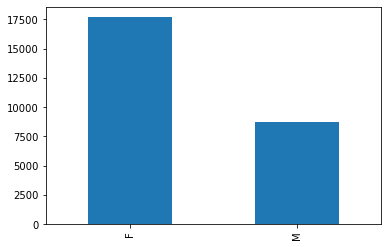

In [33]:
train_dt.gender.value_counts().plot.bar()

<AxesSubplot:>

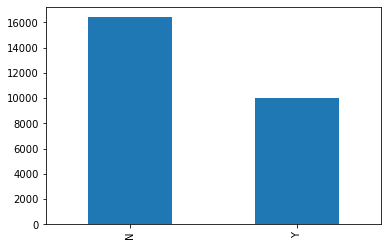

In [32]:
train_dt['car'].value_counts().plot.bar()

<AxesSubplot:>

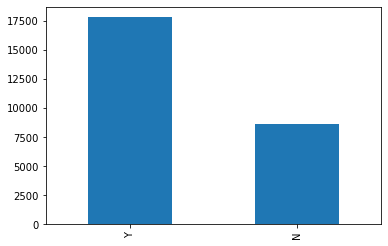

In [31]:
train_dt['reality'].value_counts().plot.bar()

<AxesSubplot:>

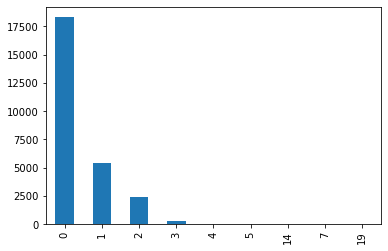

In [30]:
train_dt['child_num'].value_counts().plot.bar()

## 자녀 수 > 3 이상은 3명 이상의 자녀로 간주해서 변수 변경 필요

In [24]:
train_dt['income_total']

0        202500.0
1        247500.0
2        450000.0
3        202500.0
4        157500.0
           ...   
26452    225000.0
26453    180000.0
26454    292500.0
26455    171000.0
26456     81000.0
Name: income_total, Length: 26457, dtype: float64

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


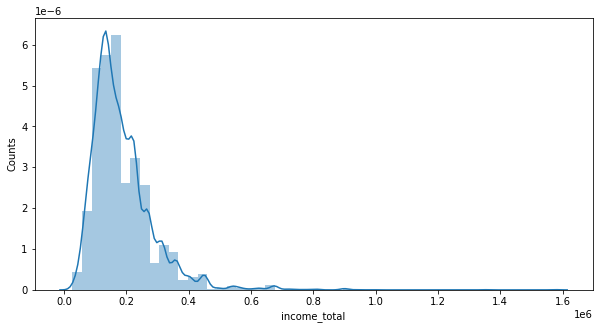

In [28]:
plt.figure(figsize=(10,5))
plt.xlabel('Income')
plt.ylabel('Counts')
sns.distplot(train_dt['income_total'])
plt.show()

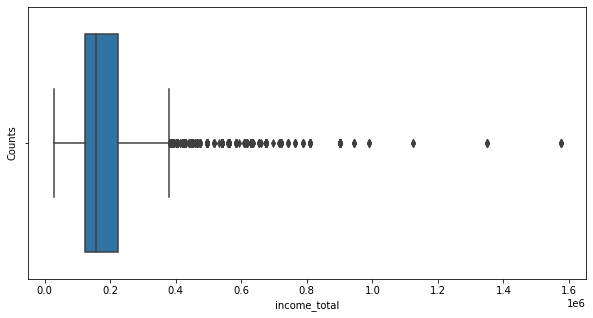

In [29]:
plt.figure(figsize=(10,5))
plt.ylabel('Counts')
sns.boxplot(x=train_dt['income_total'])
plt.show()

## Income_total -> 0.4*1e6 이상은 0.4*1e6로 변경해서 갭차이가 많이 나지 않도록 변수 세팅

<AxesSubplot:>

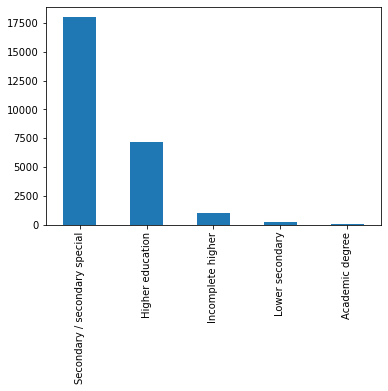

In [37]:
train_dt['edu_type'].value_counts().plot.bar()

<AxesSubplot:>

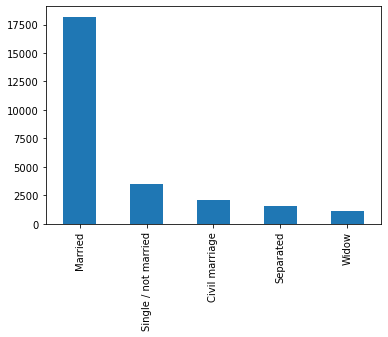

In [45]:
train_dt['family_type'].value_counts().plot.bar()

<AxesSubplot:>

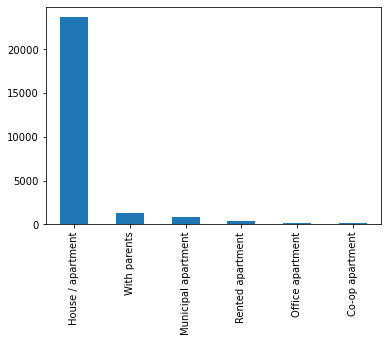

In [46]:
train_dt['house_type'].value_counts().plot.bar()

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


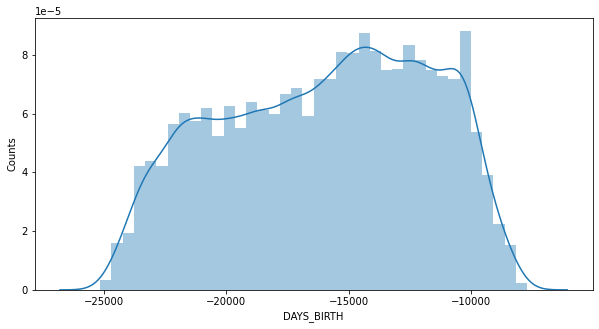

In [47]:
plt.figure(figsize=(10,5))
plt.xlabel('Income')
plt.ylabel('Counts')
sns.distplot(train_dt['DAYS_BIRTH'])
plt.show()

## DAYS_BIRTH 변수 -> 연도로 변경 필요

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


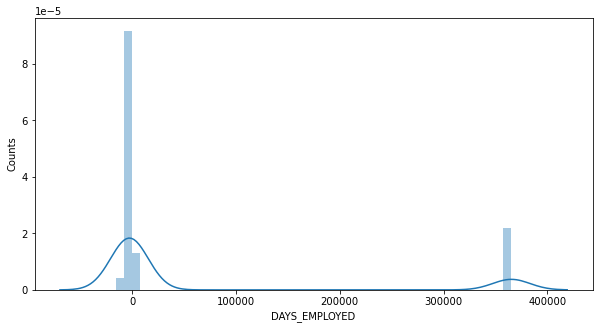

In [48]:
plt.figure(figsize=(10,5))
plt.xlabel('Income')
plt.ylabel('Counts')
sns.distplot(train_dt['DAYS_EMPLOYED'])
plt.show()

In [52]:
train_dt['DAYS_EMPLOYED'].describe()

## DAYS_EMPLOYED -> 정상적인 범위를 벗어나는 데이터로 인해 확인 필요

count     26457.000000
mean      59068.750728
std      137475.427503
min      -15713.000000
25%       -3153.000000
50%       -1539.000000
75%        -407.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
Index(['family_size', 'begin_month', 'credit'],

## DAYS_BIRTH 변수 -> 연도로 변경 필요
## Income_total -> 0.4*1e6 이상은 0.4*1e6로 변경해서 갭차이가 많이 나지 않도록 변수
## 자녀 수 > 3 이상은 3명 이상의 자녀로 간주해서 변수 변경 필요
## DAYS_EMPLOYED -> 정상적인 범위를 벗어나는 데이터로 인해 확인 필요
## FLAG_MOBIL -> 전부 1이므로 제거

In [54]:
train_dt['FLAG_MOBIL'].value_counts()
## FLAG_MOBIL -> 전부 1이므로 제거

1    26457
Name: FLAG_MOBIL, dtype: int64

In [55]:
train_dt['work_phone'].value_counts()

0    20511
1     5946
Name: work_phone, dtype: int64

In [56]:
train_dt['phone'].value_counts()

0    18672
1     7785
Name: phone, dtype: int64

In [57]:
train_dt['email'].value_counts()

0    24042
1     2415
Name: email, dtype: int64

In [58]:
train_dt['occyp_type'].value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

<AxesSubplot:>

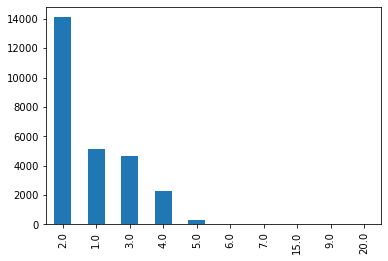

In [60]:
train_dt['family_size'].value_counts().plot.bar()

<AxesSubplot:xlabel='family_size', ylabel='income_total'>

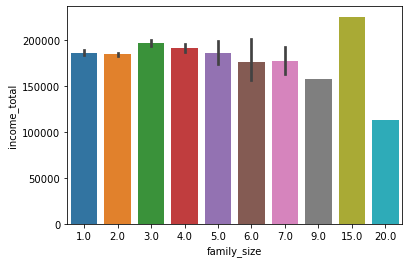

In [63]:
sns.barplot(x='family_size', y='income_total', data=train_dt)

<AxesSubplot:>

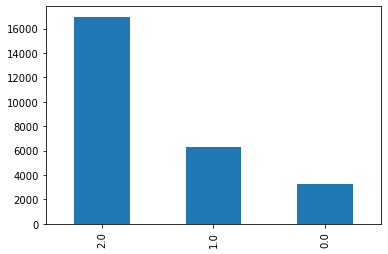

In [11]:
train_dt['credit'].value_counts().plot.bar()